<a href="https://colab.research.google.com/github/Vriksha-Srihari/Waste-Management-System/blob/main/Waste_Management_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   EfficientNet B0
*   Kaggle Garbage Classification (12 classes)
*   Adam optimizer
*   With image augumentation
*   NUM_Classes = 12
*   learning rate = 0.00001
*   loss = categorical_crossentropy
*   obtain dataset using tf function








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp  /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=5dc39691b7183ca1a69d26451a70c3245d311648e83c8aba8df1cf40218797dc
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle datasets download -d mostafaabla/garbage-classification

 94% 225M/239M [00:01<00:00, 172MB/s]
100% 239M/239M [00:01<00:00, 147MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('garbage-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
ls

drive/  files/  garbage-classification.zip  sample_data/


In [ ]:
cd files

/content/files


In [ ]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE = 224
NUM_CLASSES = 12

import itertools
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
#%cd /content/drive/My Drive/Kaggle

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
#print(tf.executing_eagerly())
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.7.0
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'garbage_classification/',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass'],
    color_mode = 'rgb',
    image_size = (IMG_SIZE, IMG_SIZE),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = 'training'
)

ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'garbage_classification/',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass'],
    color_mode = 'rgb',
    image_size = (IMG_SIZE, IMG_SIZE),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation'
)

print(ds_train)



Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.
<BatchDataset shapes: ((None, 224, 224, 3), (None, 12)), types: (tf.float32, tf.float32)>


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation", 
)

In [ ]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import EfficientNetB0

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model


In [ ]:
strategy = tf.distribute.get_strategy()
with strategy.scope():
    model = build_model(num_classes=NUM_CLASSES)

epochs = 25  # @param {type: "slider", min:8, max:80}
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)
model.save('/content/drive/MyDrive/Kodeathon22/WM2.h5')
plot_history(hist)

**Model Prediction**

In [ ]:
#model1 = tf.keras.models.load_model('/content/drive/MyDrive/Kodeathon22/WM2.h5')

In [ ]:
from google.colab import files
files.upload()

Saving shoes.jpg to shoes.jpg


{'shoes.jpg': b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x02X\x02X\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x06\x07\xff\xc4\x00\x17\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfap\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

In [ ]:
img_path = "shoes.jpg"

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [ ]:
img_preprocessed = preprocess_input(img_batch)

In [ ]:
category = model.predict(img_preprocessed)

In [ ]:
print(category[0])

[0.00823541 0.00261987 0.00419277 0.01019457 0.00966241 0.00261994
 0.00989808 0.04383352 0.00147997 0.8969475  0.00149966 0.00881646]


In [ ]:
index = 0
i = 0
max = 0
for values in category[0]:
  i = i+1
  if values > max:
    max = values
    index = i

print(index)
print(max)    

7
0.61973614


In [ ]:
l = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']
for i, p in enumerate(category):
            index=np.argmax(p) # find the class index with the highest probability sum
            klass=l[index] # get the class name that corresponds to the index
                        
        

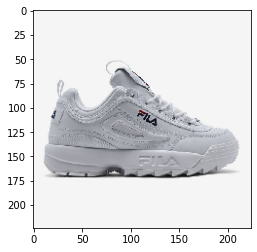

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
msg=f' image is of class {klass} ' #with a probability of {prob * 100: 6.2f} %'
print(msg)

 image is of class shoes 


<class 'numpy.ndarray'>
